# Week 9 Discussion Post
This week we discuss Hypothesis Testing by creating a histogram from .  Characteristics of probability distributions are are follows.
- Compute the probability of getting a four.
- The sample size is 100.
- Create a funtion to process 100 dice toss.
- Repeat the process for 5000 times.
- Create an array of die tosses.
- Create a Table with the results and then a histogram of the random results.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

P(sum=4): 0.0625
P(sum≠4): 0.9375


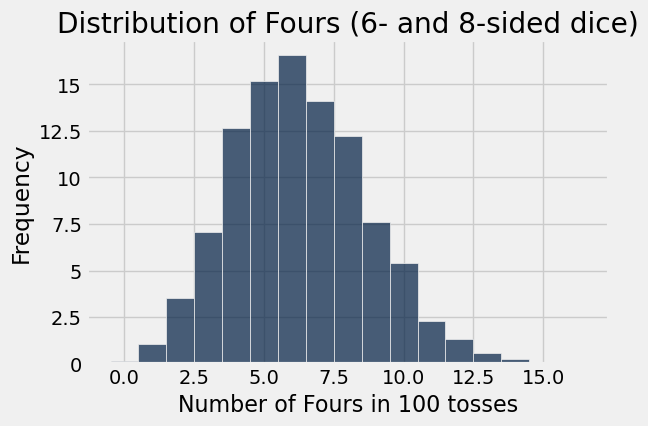

In [23]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt

p_four = 3 / (6 * 8)  # 3/48 = 0.0625
p_not_four = 1 - p_four

print("P(sum=4):", p_four)
print("P(sum≠4):", p_not_four)

sample_size = 100
num_simulations = 5000
counts = make_array()

for i in np.arange(num_simulations):
    tosses = np.random.choice(["four", "not four"], sample_size, 
                              p=[p_four, p_not_four])
    num_fours = np.count_nonzero(tosses == "four")
    counts = np.append(counts, num_fours)
    
results = Table().with_column("Number of Fours", counts)
bin_width = np.arange(counts.min()-0.5, counts.max()+.6, 1)
results.hist("Number of Fours", bins=bin_width)
plt.title("Distribution of Fours (6- and 8-sided dice)")
plt.xlabel("Number of Fours in 100 tosses")
plt.ylabel("Frequency")
plt.show()

In [8]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt

p_four = 3 / (6 * 8)  # 3/48 = 0.0625
p_not_four = 1 - p_four

sample_size = 100
eligible_population = [3/48, 1-(3/48)]

sample_proportions(sample_size, eligible_population).item(0)



0.05

In [9]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

In [10]:
counts = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

In [12]:
counts.min()

0.0

In [13]:
counts.max()

17.0

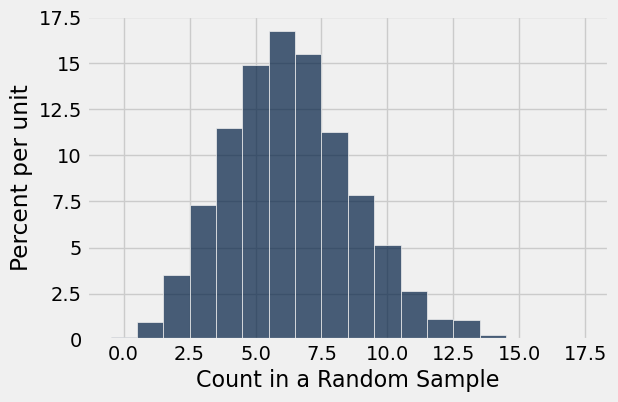

In [15]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(counts.min()-.5, counts.max()+.6, 1))